In [74]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv("annonimized.csv")  # ví dụ: "data.csv"
th=pd.read_csv("th-public.csv")
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [75]:
df.rename(columns={
    "concat('it001',`assignment_id`)": 'assignment_id',
    "concat('it001',`problem_id`)": 'problem_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)":'language_id'
}, inplace=True)
th.rename(columns={
    "hash": "username",
}, inplace=True)
df.head()

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [84]:
import json

# Giả sử bạn đã đọc file CSV:
# df = pd.read_csv("submissions.csv")

# Bước 1: Tiền xử lý thời gian
df['created_at'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%m-%d %H:%M:%S', errors='coerce')
df['submit_date'] = df['created_at'].dt.date

# Bước 2: Thời gian hoạt động mỗi lần nộp
df['active_duration'] = (df['updated_at'] - df['created_at']).dt.total_seconds()

# Bước 3: Cờ đánh dấu judgement > 0
def is_judgement_nonzero(j):
    try:
        data = json.loads(j)
        total = sum(sum(v) for v in data.values() if isinstance(v, list))
        return total > 0
    except:
        return False

df['judgement_nonzero'] = df['judgement'].apply(is_judgement_nonzero)

# Bước 4: Tính các đặc trưng

# Tổng số lần nộp
submit_counts = df.groupby("username").size().rename("total_submissions")

# Số problem tham gia
problem_counts = df.groupby("username")["problem_id"].nunique().rename("num_problems")

# Số assignment tham gia
assignment_counts = df.groupby("username")["assignment_id"].nunique().rename("num_assignments")

# Số ngày hoạt động
active_days = df.groupby("username")["submit_date"].nunique().rename("active_days")

# Tính điểm có trọng số cho mỗi lần nộp
df["weighted_score"] = df["pre_score"] * df["coefficient"]
# Tính tổng điểm có trọng số theo username
total_weighted_score = df.groupby("username")["weighted_score"].sum().rename("total_weighted_score")

# Tổng pre_score
total_prescore = df.groupby("username")["pre_score"].sum().rename("total_prescore")

# Số problem với is_final = 1
final_problem = df[df["is_final"] == 1].groupby("username")["problem_id"].nunique().rename("num_final_problems")

# Số problem với is_final = 1 và pre_score=10000
final_problem_prescore = df[
    (df["is_final"] == 1) & (df["pre_score"] == 10000)
].groupby("username")["problem_id"].nunique().rename("num_final_prescore_problems")


# Số problem có pre_score < 10000
low_score_problem = df[df["pre_score"] < 10000].groupby("username")["problem_id"].nunique().rename("num_low_score_problems")

# Tổng số lần nộp có judgement > 0
nonzero_judgement_submissions = df[df["judgement_nonzero"]].groupby("username").size().rename("nonzero_judgement_submissions")
# Tổng thời gian hoạt động mỗi ngày (cho mỗi username và ngày cụ thể)
daily_time = df.groupby(["username", "submit_date"])["active_duration"].sum()

# Sau đó tính trung bình theo từng username
avg_time_per_day = daily_time.groupby("username").mean().rename("avg_time_per_day")


# Lọc ra những lần nộp đạt yêu cầu
final_10000 = df[(df["is_final"] == 1) & (df["pre_score"] == 10000)]
# Lấy bài nộp đầu tiên theo (username, problem_id)
first_submits = final_10000.sort_values("created_at").drop_duplicates(subset=["username", "problem_id"], keep="first")
# Đếm số lượng problem khác nhau thỏa điều kiện theo từng username
n_problems_first10000 = first_submits.groupby("username")["problem_id"].nunique().rename("n_problems_first10000")

# thời gian trung bình cho mỗi bài đạt yêu cầu đó
avg_duration_per_problem = first_submits.groupby("username")["active_duration"].mean().rename("avg_duration_per_problem")

# final=1 ,status=score, pre_score=10000
final_prescore_status = df[
    (df["is_final"] == 1) &
    (df["pre_score"] == 10000) &
    (df["status"] == "SCORE")
].groupby("username")["problem_id"].nunique().rename("final_prescore_status")

final_prescore_status1 = df[
    (df["is_final"] == 1) &
    (df["pre_score"] == 10000) &
    (df["status"] == "SCORE")
].groupby("username").size().rename("final_prescore_status1")
# Bước 5: Gộp tất cả các đặc trưng
features2 = pd.concat([
    submit_counts,
    problem_counts,
    assignment_counts,
    active_days,
    total_prescore,
    final_problem,
    low_score_problem,
    nonzero_judgement_submissions,
    total_weighted_score,
    #avg_time_per_day,
    n_problems_first10000,
    avg_duration_per_problem,
    final_problem_prescore,
    final_prescore_status,
    final_prescore_status1
], axis=1).fillna(0)

# (Tùy chọn) Xuất ra file CSV
# features.to_csv("user_features.csv")
features2 = features2.reset_index()
features2= pd.DataFrame(features2)
# In kết quả
features2


,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,n_problems_first10000,avg_duration_per_problem,num_final_prescore_problems,final_prescore_status,final_prescore_status1
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,45.0,10.222222,45.0,45.0,46.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,72.0,1013.986111,72.0,72.0,72.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,58.0,11.517241,58.0,58.0,59.0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,4,13,595276,47.0,17.0,7.0,59527600,47.0,8.127660,47.0,47.0,47.0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,44.0,10.318182,44.0,44.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,34,9,7,413000,34.0,13.0,0.0,41300000,34.0,4.764706,34.0,34.0,34.0
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,77,6,16,1613185,77.0,39.0,10.0,161318500,74.0,39.283784,74.0,74.0,75.0
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,100,6,48,2184330,100.0,58.0,49.0,218433000,99.0,8.323232,99.0,99.0,102.0
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,34,7,7,408273,34.0,21.0,8.0,40827300,30.0,9.033333,30.0,30.0,30.0


In [85]:
df_merged1 = pd.merge(features2,th, on="username", how="inner")
df_merged1

,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,n_problems_first10000,avg_duration_per_problem,num_final_prescore_problems,final_prescore_status,final_prescore_status1,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,45.0,10.222222,45.0,45.0,46.0,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,72.0,1013.986111,72.0,72.0,72.0,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,58.0,11.517241,58.0,58.0,59.0,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,44.0,10.318182,44.0,44.0,58.0,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,9,22,1042765,90.0,45.0,4.0,104276500,79.0,1134.518987,79.0,79.0,79.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,111,43,6,15,574052,42.0,23.0,5.0,57405200,37.0,9.108108,37.0,37.0,39.0,6
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,104,17,29,1708325,104.0,64.0,17.0,170832500,102.0,9.009804,102.0,102.0,102.0,8.5
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,52,8,10,658331,52.0,21.0,6.0,65833100,47.0,8.531915,47.0,47.0,47.0,5.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,114,12,33,2383183,114.0,85.0,65.0,238318300,109.0,683.944954,109.0,109.0,109.0,10


In [86]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       761 non-null    object 
 1   total_submissions              761 non-null    int64  
 2   num_problems                   761 non-null    int64  
 3   num_assignments                761 non-null    int64  
 4   active_days                    761 non-null    int64  
 5   total_prescore                 761 non-null    int64  
 6   num_final_problems             761 non-null    float64
 7   num_low_score_problems         761 non-null    float64
 8   nonzero_judgement_submissions  761 non-null    float64
 9   total_weighted_score           761 non-null    int64  
 10  n_problems_first10000          761 non-null    float64
 11  avg_duration_per_problem       761 non-null    float64
 12  num_final_prescore_problems    761 non-null    flo

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8396\1800634264.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


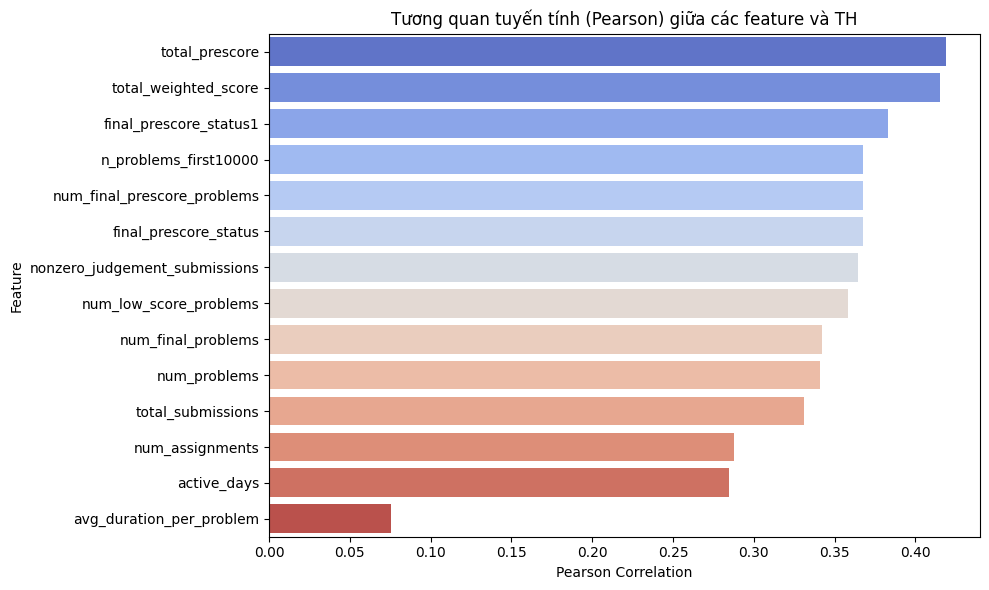

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df_merged1 với các cột:
# ['username', 'total_submissions', ..., 'avg_time_per_day', 'CK']

# 1. Đảm bảo CK là numeric
df_merged1['TH'] = pd.to_numeric(df_merged1['TH'], errors='coerce')

# 2. Tính hệ số tương quan Pearson giữa các feature và CK
corr_with_ck = (
    df_merged1
    .drop(columns=['username'])
    .corrwith(df_merged1['TH'], numeric_only=True)
    .drop('TH')              # loại bỏ tự tương quan
    .sort_values(ascending=False)
)

# 3. Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_ck.values,
    y=corr_with_ck.index,
    palette='coolwarm'
)
plt.title('Tương quan tuyến tính (Pearson) giữa các feature và TH')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



biểu đồ trên thể hiện sự tương quan giữa các feature với TH Nhận thấy rằng các tiêu chí đã lọc nó quan hệ tuyến tính thuận với điểm quá trình (tiến về 1) do nó phản ánh năng lực siêng năng của sinh viên

✅ Best RandomForest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
✅ Best SVR Params: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}

🎯 Kết quả so sánh mô hình:
                        Model       MAE        R²
1               Random Forest  1.345119  0.407467
3  Random Forest (GridSearch)  1.344625  0.405922
4            SVR (GridSearch)  1.359326  0.342783
2                         SVR  1.399955  0.341005
0           Linear Regression  1.483883  0.315383
5            XGBoost (Linear)  1.514949  0.284585


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8396\3474148733.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")


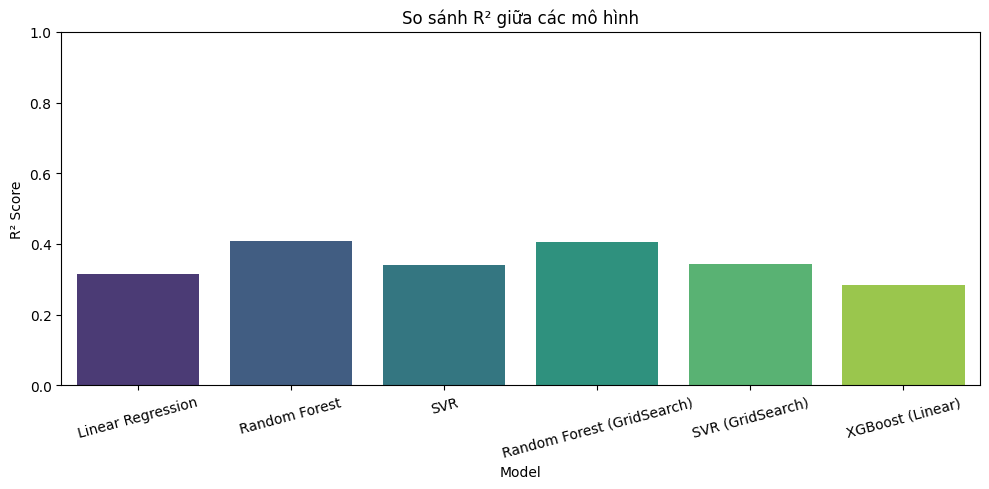

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Xoá các dòng thiếu điểm CK
df_merged3 = df_merged1.dropna(subset=["TH"])

# 2. Chia X, y
X = df_merged3.drop(columns=["TH", "username"])
y = df_merged3["TH"]

# 3. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. GridSearch cho RandomForest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
print("✅ Best RandomForest Params:", grid_rf.best_params_)

# 6. GridSearch cho SVR
param_grid_svr = {
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.5],
    "kernel": ["rbf", "linear"]
}
grid_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_svr,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
# 7. Thêm mô hình XGBoost (Linear Booster)
xgb_model = XGBRegressor(
    objective="reg:squarederror",  # tránh cảnh báo
    booster="gblinear",            # sử dụng linear boosting
    random_state=42
)

grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_
print("✅ Best SVR Params:", grid_svr.best_params_)

# 8. Tạo models sau khi đã có best_rf và best_svr
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Random Forest (GridSearch)": best_rf,
    "SVR (GridSearch)": best_svr,
    "XGBoost (Linear)": xgb_model,
}

# 8. Huấn luyện và đánh giá
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "R²": r2})

# 9. Hiển thị kết quả
results_df = pd.DataFrame(results)
print("\n🎯 Kết quả so sánh mô hình:")
print(results_df.sort_values(by="R²", ascending=False))

# 10. Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
plt.title("So sánh R² giữa các mô hình")
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


1. Random Forest
MAE = 1.345,R² = 0.407
MAE thấp nhất trong tất cả mô hình → dự đoán gần đúng nhất với thực tế.
R² cao nhất (0.407) → mô hình giải thích được ~40.7% phương sai trong dữ liệu.
->Đây là mô hình tốt nhất tổng thể: sai số thấp, độ phù hợp cao.

2. Random Forest (GridSearch)
MAE = 1.344,R² = 0.405
MAE gần như tương đương bản mặc định (chênh lệch rất nhỏ).
R² giảm nhẹ, có thể do overfitting nhẹ khi tinh chỉnh tham số.
-> Tối ưu hyperparameter không cải thiện nhiều, chứng tỏ mô hình gốc đã khá ổn.

3. SVR (Support Vector Regression)
a. SVR (GridSearch)
MAE = 1.359,R² = 0.343 
MAE thấp hơn bản SVR mặc định → dự đoán chính xác hơn sau khi tinh chỉnh.
R² tăng nhẹ → mô hình học được tốt hơn từ dữ liệu.
->Tuy nhiên, vẫn thua Random Forest cả về MAE lẫn R².

b. SVR (mặc định)
MAE = 1.399,R² = 0.341 
Sai số cao hơn bản GridSearch → mặc định chưa tối ưu.
R² thấp hơn chút → giải thích kém hơn.
-> Cần GridSearch mới đạt hiệu quả.

 4. Linear Regression
MAE = 1.484,R² = 0.315
MAE cao thứ nhì, cho thấy độ lệch so với thực tế lớn.
R² chỉ khoảng 31.5% → không nắm bắt được cấu trúc phức tạp của dữ liệu.
->Mô hình tuyến tính đơn giản không phù hợp với dữ liệu có tính phi tuyến.

 5. XGBoost (Linear Booster)
MAE = 1.515,R² = 0.285 
Tệ nhất trong tất cả: MAE cao nhất, R² thấp nhất.
Vì bạn dùng booster="gblinear", tức chỉ là hồi quy tuyến tính có regularization.
->Gần giống Linear Regression, nhưng tệ hơn do chưa tối ưu tham số.



In [93]:
# Đảm bảo không có cột dư thừa (tránh lỗi scale)
features4 = features2.reset_index() if features2.index.name == "username" else features2.copy()
features4 = features4.drop(columns=[col for col in ["index", "CK"] if col in features4.columns])

# Tạo bản sao để chứa kết quả dự đoán
features3 = features4[["username"]].copy()

# Lấy tập đặc trưng để dự đoán (loại bỏ cột username)
X_new = features4.drop(columns=["username"])

# Scale dữ liệu giống như lúc train
X_new_scaled = scaler.transform(X_new)

# Dự đoán bằng từng mô hình
for name, model in models.items():
    # Dự đoán và làm tròn
    features3["TH"] = model.predict(X_new_scaled).round(1)

    # Tạo tên file từ tên mô hình (loại bỏ dấu ngoặc và dấu cách)
    file_name = f"du_doan_th_{name.lower().replace(' ', '_').replace('(', '').replace(')', '')}.csv"

    # Ghi kết quả ra file: chỉ gồm username và điểm CK
    features3[["username", "TH"]].to_csv(file_name, index=False)
    print(f"✅ Đã ghi file '{file_name}'")


✅ Đã ghi file 'du_doan_th_linear_regression.csv'
✅ Đã ghi file 'du_doan_th_random_forest.csv'
✅ Đã ghi file 'du_doan_th_svr.csv'
✅ Đã ghi file 'du_doan_th_random_forest_gridsearch.csv'
✅ Đã ghi file 'du_doan_th_svr_gridsearch.csv'
✅ Đã ghi file 'du_doan_th_xgboost_linear.csv'
